In [30]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_059bf81101364083ad1bde7bd00b4814 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3X3Z6ZLH6whVmVqU3-F4yyg8COzIATtu-zeFWI9XRWZA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_059bf81101364083ad1bde7bd00b4814.get_object(Bucket='lifeexpectancy-donotdelete-pr-feq13ygxsmyez6',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [31]:
import numpy as np 
import matplotlib.pyplot as plt
df_data_1.shape
df_data_1.columns



Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [32]:
df_data_1.dtypes



Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Data preprocessing

In [33]:

df_data_1.drop('Country',axis=1,inplace=True)
df_data_1["Status"]=df_data_1["Status"].map({"Developing":0,"Developed":1})




Missing values Treatment



In [34]:
df_data_1.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [35]:
df_data_1['Alcohol'].fillna(df_data_1['Alcohol'].mean(),inplace=True)
df_data_1['Hepatitis B'].fillna(df_data_1['Hepatitis B'].mean(),inplace=True)
df_data_1['Polio'].fillna(df_data_1['Polio'].mean(),inplace=True)
df_data_1['Population'].fillna(df_data_1['Population'].mean(),inplace=True)
df_data_1['GDP'].fillna(df_data_1['GDP'].mean(),inplace=True)
df_data_1['Schooling'].fillna(df_data_1['Schooling'].mean(),inplace=True)
df_data_1['Income composition of resources'].fillna(df_data_1['Income composition of resources'].mean(),inplace=True)
df_data_1.dropna(inplace=True)
df_data_1.isnull().sum()


Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

OUTLIERS

In [36]:
df_data_1.rename(columns={'Year':'Year','Status':'Status','Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths','Alcohol':'Alcohol','percentage expenditure':'Expenditure','Hepatitis B':'Hepatitis_B',
         ' BMI ':"BMI",'under-five deaths ':'Under_five_deaths','Polio':'Polio','Total expenditure':'Total_Expenditure','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIVAIDS','GDP':'GDP','Population':'Population',' thinness  1-19 years':'Thinness 1-19',
       ' thinness 5-9 years':'Thinness 5-9','Income composition of resources':'Income' ,'Schooling':'Schooling','Life expectancy ':'Life_Expectancy','Measles ':"Measles"},inplace=True)



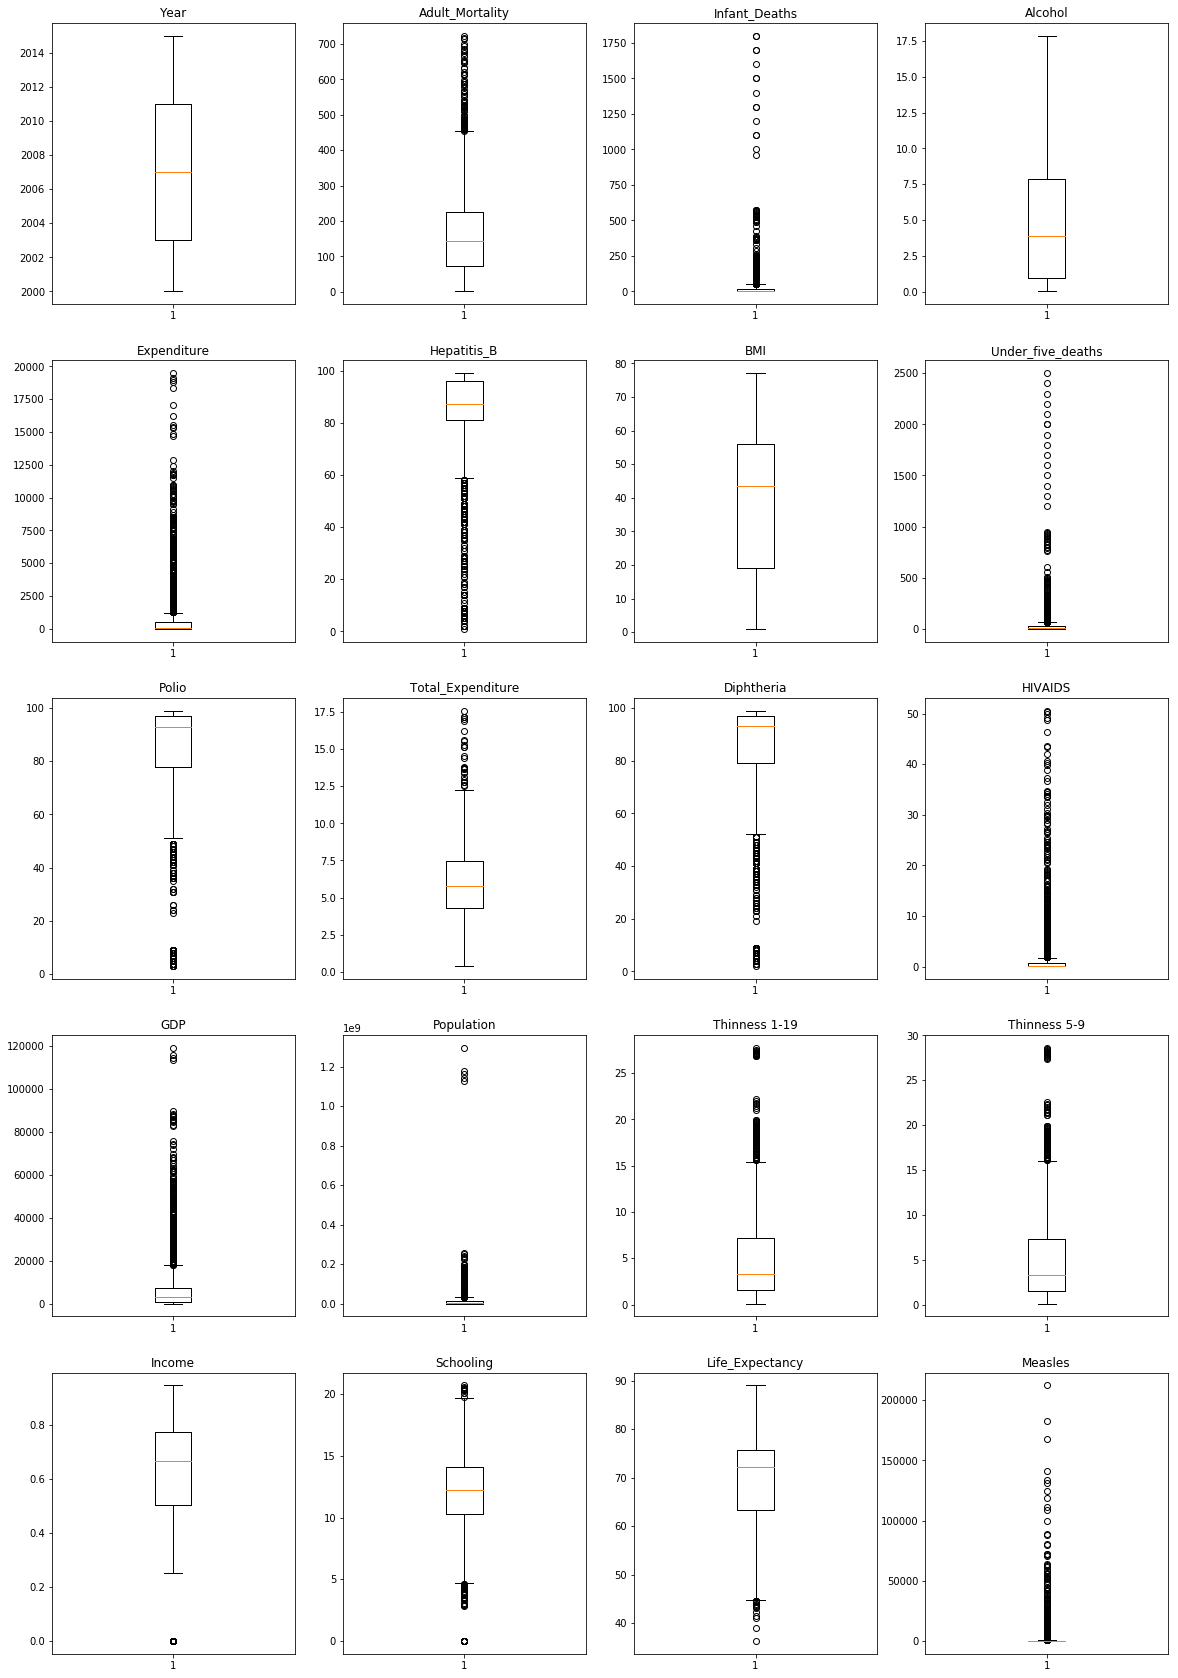

,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 1-19,Thinness 5-9,Income,Schooling
0.95,2014.0,1.0,81.9,415.0,97.0,12.0025,5052.084096,99.0,10370.75,64.20,...,99.0,9.760,99.0,9.4,38357.653103,42262443.5,13.9,13.925,0.8890,16.8
0.10,2001.0,0.0,54.8,18.0,0.0,0.0250,0.000000,55.0,0.00,11.95,...,54.0,2.835,52.0,0.1,188.649532,45691.5,0.8,0.800,0.3905,8.0


In [37]:
col_dict={'Year':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Expenditure':5,'Hepatitis_B':6,
         "BMI":7,'Under_five_deaths':8,'Polio':9,'Total_Expenditure':10,'Diphtheria':11,'HIVAIDS':12,'GDP':13,'Population':14,'Thinness 1-19':15,
         'Thinness 5-9':16,'Income':17,'Schooling':18,'Life_Expectancy':19,'Measles':20}
plt.figure(figsize=(20,30))
for va,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(df_data_1[va],whis=1.5)
    plt.title(va)
    
plt.show()
lb=0.1
hb=0.95
res=df_data_1.quantile([hb,lb])
res
    

TRAINING DATA

In [38]:
x=df_data_1.drop(["Life_Expectancy"],axis=1)
y=df_data_1['Life_Expectancy']
df_data_1.columns

Index(['Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_five_deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIVAIDS', 'GDP', 'Population', 'Thinness 1-19', 'Thinness 5-9',
       'Income', 'Schooling'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=46)
test_x.shape


(536, 20)

In [40]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
lr=LR(normalize=True)
lr.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [41]:
predict=lr.predict(train_x)
predict1=lr.predict(test_x)
lr.score(test_x,test_y)




0.7951370381984803

In [42]:
print(mse(predict1,test_y),mse(predict,train_y))

18.86563320159589 15.609062889226857


In [43]:
print(rs(predict1,test_y),rs(predict,train_y))

0.7441483050250706 0.7922516953609362


In [44]:
from sklearn.tree import DecisionTreeRegressor as dt
DT=dt(max_depth=15,min_samples_leaf=100)
DT.fit(train_x,train_y)
DT.score(test_x,test_y)

0.856227459417005

In [45]:
from sklearn.ensemble import RandomForestRegressor as rt
RT=rt(max_depth=15,min_samples_leaf=100)
RT.fit(train_x,train_y)
RT.score(test_x,test_y)

0.8595744399665659

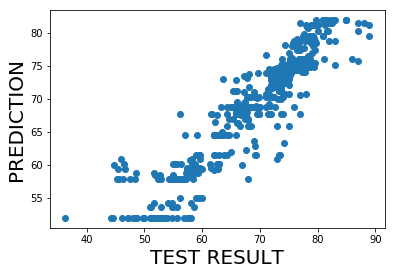

In [46]:
predict2=RT.predict(test_x)
plt.scatter(test_y,predict2)
plt.xlabel("TEST RESULT",fontsize=20)
plt.ylabel("PREDICTION",fontsize=20)
plt.show()

In [47]:
!pip install watson-machine-learning-client

In [48]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [49]:
wml_credentials={
  "apikey": "9m802N_sR6r43qL22GqByAZHgwodOyS_naK392MzvrSx",
  "iam_apikey_description": "Auto-generated for key 25b0fdf7-3fd5-4ae6-898e-3bd2236de1b9",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/dc17c4eb65e54b13b2d6855eee3b49c0::serviceid:ServiceId-b4c369f0-3769-4f9f-8233-ec8d50443ae8",
  "instance_id": "91151e2c-2c13-4501-94a7-d7dc6c3a9470",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [50]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [51]:
metadata={
    
    client.repository.ModelMetaNames.AUTHOR_NAME:'Nikitha',
    client.repository.ModelMetaNames.NAME:"predicting life expectancy",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"nikitha.rdy213@gmail.com",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

In [52]:
model_details=client.repository.store_model(RT,meta_props=metadata)



In [53]:
published_model_uid=client.repository.get_model_uid(model_details)

In [54]:
published_model_uid

'ee9e3d85-5e5b-4a09-a7d2-2e25eaba78f1'

In [55]:
client.deployments.list()

------------------------------------  --------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                        TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
ab6c39b9-be81-438e-8bf4-bf607b015b42  predicting life expectancy  online  DEPLOY_SUCCESS  2020-06-27T04:31:07.101Z  scikit-learn-0.20  model
7d476925-e50c-4303-b3b2-14e86b62016a  predicting life expectancy  online  DEPLOY_SUCCESS  2020-06-26T12:34:15.697Z  scikit-learn-0.20  model
392025bc-1cf4-429c-91ef-3d158ad13b99  predicting life expectancy  online  DEPLOY_SUCCESS  2020-06-22T10:33:03.628Z  scikit-learn-0.20  model
d0c61bf7-44ee-47c3-b722-a4349b8e987b  predicting life expectancy  online  DEPLOY_SUCCESS  2020-06-22T05:49:54.369Z  scikit-learn-0.20  model
b78ad5fe-2e22-4601-aaae-3037cada6c64  predicting life expectancy  online  DEPLOY_SUCCESS  2020-06-22T05:48:17.452Z  scikit-learn-0.20  mod

In [56]:
client.deployments.delete("392025bc-1cf4-429c-91ef-3d158ad13b99")

'SUCCESS'

In [57]:

created_deployment=client.deployments.create(published_model_uid,name="predicting life expectancy")




#######################################################################################

Synchronous deployment creation for uid: 'ee9e3d85-5e5b-4a09-a7d2-2e25eaba78f1' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ce3c2525-dcf2-49bd-83a0-3de4b41d53b0'
------------------------------------------------------------------------------------------------




In [58]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint


'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/91151e2c-2c13-4501-94a7-d7dc6c3a9470/deployments/ce3c2525-dcf2-49bd-83a0-3de4b41d53b0/online'